## Sampling the Dataset

In this notebook, we begin to explore the iris dataset by sampling. First, let's sample three random points and examine them.

### Visualizing the Distributions of the Features

### `pd.melt()`

We can use `pandas.melt` to help with this visualization. Melt converts wide form data to long form data. So that

    +---+---+---+
    | A | B | C |
    +===+===+===+
    | 1 | 2 | 3 |
    | 3 | 4 | 5 |
    +---+---+---+
    
becomes

    +-----+-----+
    | var | val |
    +=====+=====+
    |  A  |  1  |
    |  A  |  3  |
    |  B  |  2  |
    |  B  |  4  |
    |  C  |  3  |
    |  C  |  5  |
    +-----+-----+

Here, is a sample of the data

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rc('figure', figsize=(20, 6))

IRIS = load_iris()
iris_df = pd.DataFrame(IRIS.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
labels = IRIS.target_names

In [2]:
samp = iris_df.sample(5)
samp

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
77,6.7,3.0,5.0,1.7
94,5.6,2.7,4.2,1.3
81,5.5,2.4,3.7,1.0
126,6.2,2.8,4.8,1.8


And it becomes

In [3]:
samp_melt = pd.melt(samp.select_dtypes([float]))
samp_melt

,variable,value
0,sepal_length,5.1
1,sepal_length,6.7
2,sepal_length,5.6
3,sepal_length,5.5
4,sepal_length,6.2
5,sepal_width,3.5
6,sepal_width,3.0
7,sepal_width,2.7
8,sepal_width,2.4
9,sepal_width,2.8


This is the exact format expected of the box plot in Seaborn.

In [4]:
iris_melt = pd.melt(iris_df.select_dtypes([float]))

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


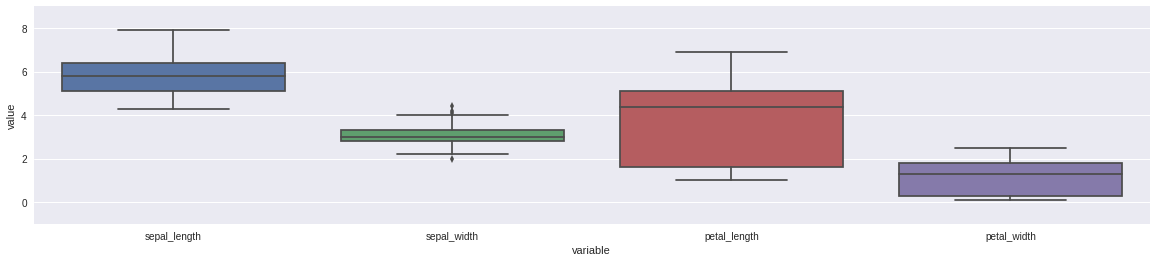

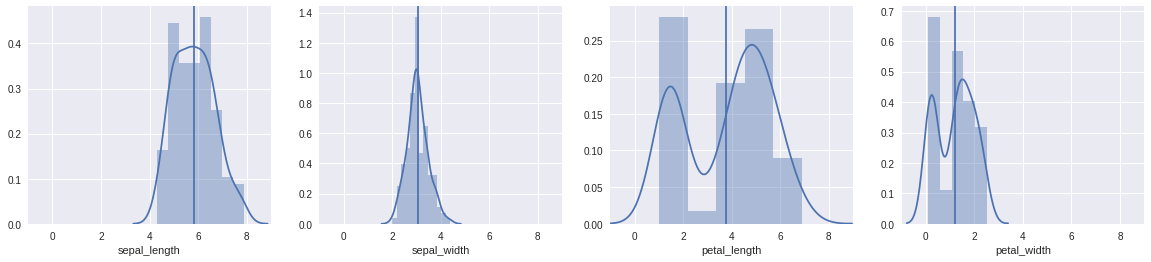

In [5]:
fig = plt.figure(figsize=(20,4))
sns.boxplot(x='variable', y='value', data=iris_melt)
plt.ylim(-1,9)

_, ax = plt.subplots(1,4, figsize=(20,4))
iris_numerical_df = iris_df.select_dtypes([float])

for i, feat in enumerate(iris_numerical_df.columns):
    sns.distplot(iris_numerical_df[feat], ax=ax[i])
    ax[i].set_xlim(-1,9)
    ax[i].axvline(iris_numerical_df[feat].mean())

In [6]:
np.random.seed(42)

In [7]:
sample_1 = iris_df.sample(3)

In [8]:
sample_1

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3


In [9]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
sample_1.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,3.0,6.500000,1.058301,5.7,5.90,6.1,6.90,7.7
sepal_width,3.0,3.066667,0.642910,2.6,2.70,2.8,3.30,3.8
petal_length,3.0,4.433333,2.610236,1.7,3.20,4.7,5.80,6.9
petal_width,3.0,1.266667,1.001665,0.3,0.75,1.2,1.75,2.3


### Visualize the Differences Using Seaborn

#### VIsualized with a Box Plot

In [11]:
sample_1_melt = pd.melt(sample_1.select_dtypes([float]))

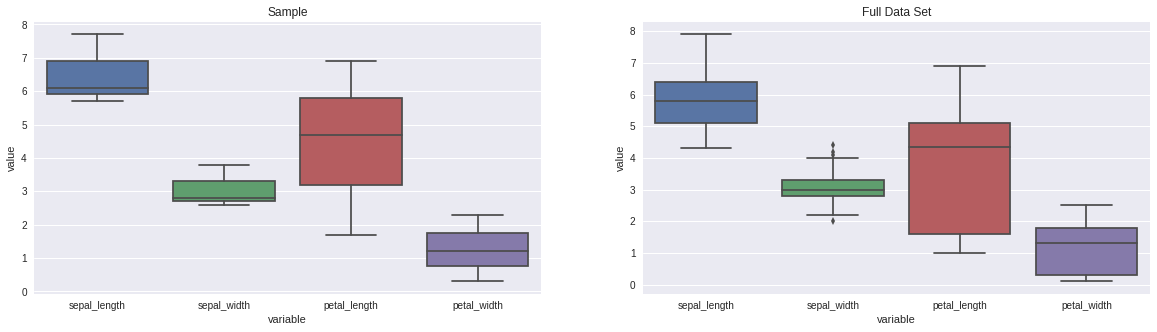

In [12]:
_, ax = plt.subplots(1, 2, figsize=(20,5))

sns.boxplot(x='variable', y='value', data=sample_1_melt, ax=ax[0])
ax[0].set_title('Sample')

sns.boxplot(x='variable', y='value', data=iris_melt, ax=ax[1])
ax[1].set_title('Full Data Set');

#### Visualized with a Swarmplot

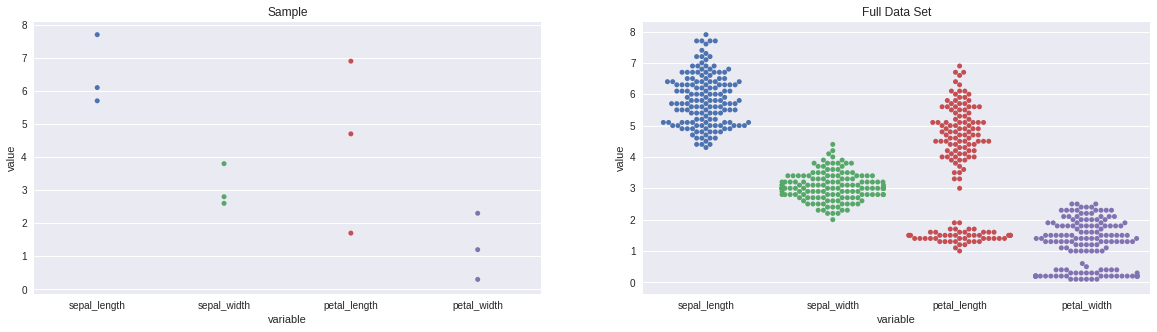

In [13]:
_, ax = plt.subplots(1, 2, figsize=(20,5))

sns.swarmplot(x='variable', y='value', data=sample_1_melt, ax=ax[0])
ax[0].set_title('Sample')

sns.swarmplot(x='variable', y='value', data=iris_melt, ax=ax[1])
ax[1].set_title('Full Data Set');

#### Visualized with a Stripplot

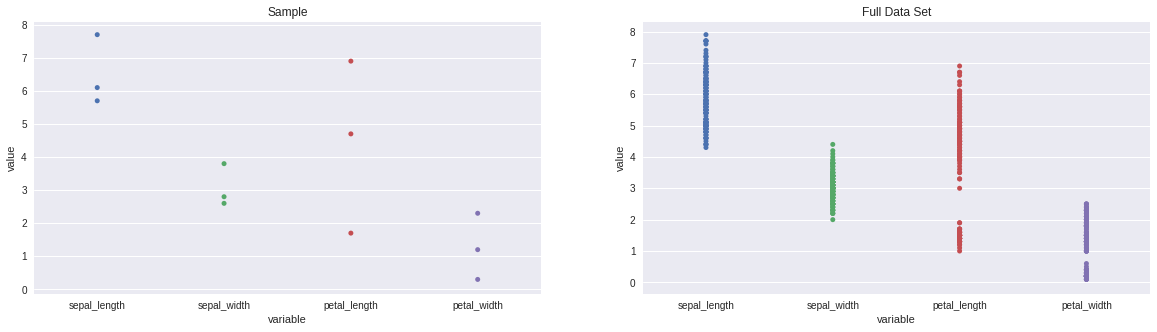

In [14]:
_, ax = plt.subplots(1, 2, figsize=(20,5))

sns.stripplot(x='variable', y='value', data=sample_1_melt, ax=ax[0])
ax[0].set_title('Sample')

sns.stripplot(x='variable', y='value', data=iris_melt, ax=ax[1])
ax[1].set_title('Full Data Set');

#### Visualized with a Violinplot

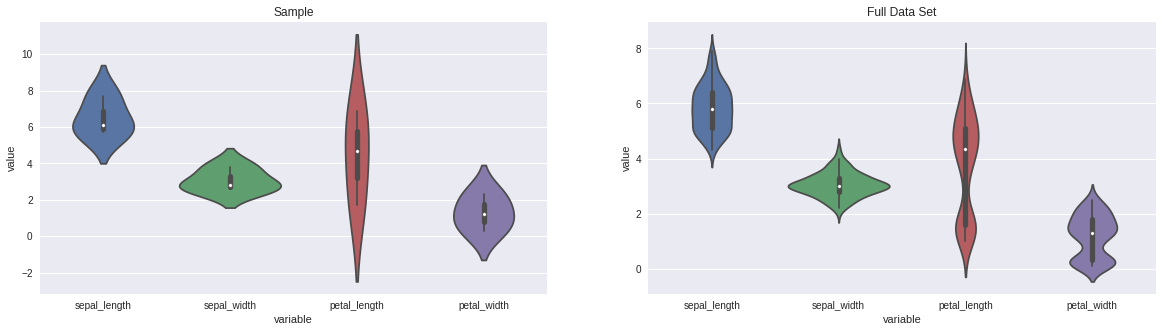

In [15]:
_, ax = plt.subplots(1, 2, figsize=(20,5))

sns.violinplot(x='variable', y='value', data=sample_1_melt, ax=ax[0])
ax[0].set_title('Sample')

sns.violinplot(x='variable', y='value', data=iris_melt, ax=ax[1])
ax[1].set_title('Full Data Set');

#### Measure the Performance

In [16]:
error_sample_1 = np.abs(iris_df.mean() - sample_1.mean())
error_sample_1

sepal_length    0.656667
sepal_width     0.012667
petal_length    0.674667
petal_width     0.068000
dtype: float64

#### Normalized

In [17]:
error_sample_1_normalized = np.abs((iris_df.mean() - sample_1.mean())/iris_df.std())
error_sample_1_normalized

sepal_length    0.793012
sepal_width     0.029213
petal_length    0.382373
petal_width     0.089103
dtype: float64

### A Second Sample

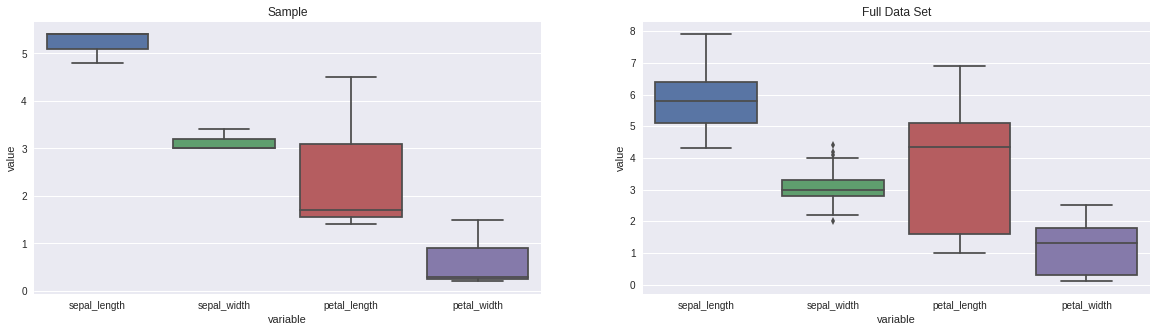

In [18]:
sample_2 = iris_df.sample(3)

sample_2_melt = pd.melt(sample_2.select_dtypes([float]))
iris_melt = pd.melt(iris_df.select_dtypes([float]))

_, ax = plt.subplots(1, 2, figsize=(20,5))

sns.boxplot(x='variable', y='value', data=sample_2_melt, ax=ax[0])
ax[0].set_title('Sample')

sns.boxplot(x='variable', y='value', data=iris_melt, ax=ax[1])
ax[1].set_title('Full Data Set');

In [19]:
error_sample_2_normalized = np.abs((iris_df.mean() - sample_2.mean())/iris_df.std())

In [20]:
display(error_sample_1_normalized)
display(error_sample_2_normalized)

sepal_length    0.793012
sepal_width     0.029213
petal_length    0.382373
petal_width     0.089103
dtype: float64

sepal_length    0.776911
sepal_width     0.182967
petal_length    0.694468
petal_width     0.697101
dtype: float64

### What about a larger sample?

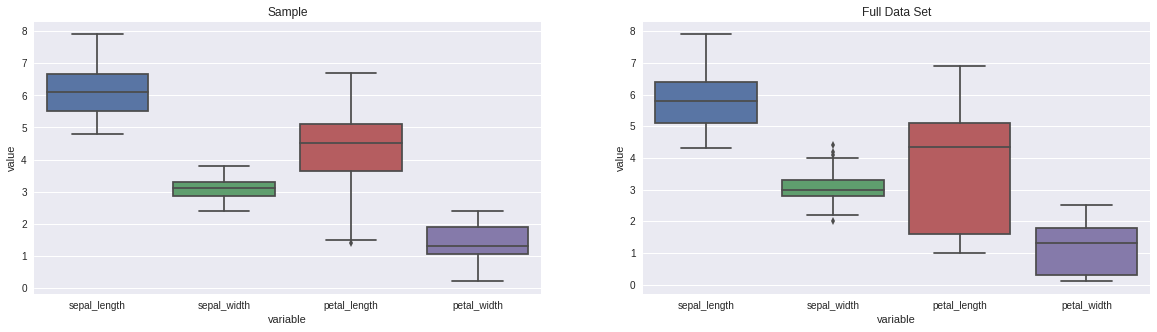

In [21]:
sample_3 = iris_df.sample(15)

sample_3_melt = pd.melt(sample_3.select_dtypes([float]))
iris_melt = pd.melt(iris_df.select_dtypes([float]))

_, ax = plt.subplots(1, 2, figsize=(20,5))

sns.boxplot(x='variable', y='value', data=sample_3_melt, ax=ax[0])
ax[0].set_title('Sample')

sns.boxplot(x='variable', y='value', data=iris_melt, ax=ax[1])
ax[1].set_title('Full Data Set');

In [22]:
error_sample_3_normalized = np.abs((iris_df.mean() - sample_3.mean())/iris_df.std())

In [23]:
display(error_sample_1_normalized)
display(error_sample_2_normalized)
display(error_sample_3_normalized)

sepal_length    0.793012
sepal_width     0.029213
petal_length    0.382373
petal_width     0.089103
dtype: float64

sepal_length    0.776911
sepal_width     0.182967
petal_length    0.694468
petal_width     0.697101
dtype: float64

sepal_length    0.406570
sepal_width     0.121465
petal_length    0.219902
petal_width     0.185195
dtype: float64

In [2]:
def feature_error_by_n(data, feature, n):
    sample = data[feature].sample(n)
    error = np.abs((data[feature].mean() - sample.mean())/data[feature].std())
    return error

In [3]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [4]:
feature_error_by_n(iris_df, 'sepal_length', 3)

0.1730940663922016

Use a list comprehension to generate errors for every possible value of `n`.

In [5]:
sepal_length_error_by_n = [feature_error_by_n(iris_df, 'sepal_length', n) for n in range(1,151)]

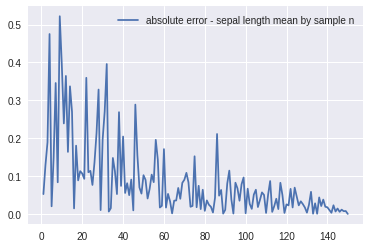

In [6]:
plt.plot(range(1,151), sepal_length_error_by_n, label='absolute error - sepal length mean by sample n')
plt.legend()

In [7]:
iris_df['label'] = IRIS.target

In [8]:
iris_df.to_csv('data/iris.csv')